# Imports

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from khan_helpers import Experiment
from khan_helpers.constants import FIG_DIR
from khan_helpers.functions import multicol_display, set_figure_style

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
%matplotlib inline

Experiment & Participant classes, helper functions, and variables used across multiple notebooks can be found in `/mnt/code/khan_helpers/khan_helpers`, or on GitHub, [here](https://github.com/contextlab/efficient-learning-khan/tree/master/code/khan_helpers).<br />You can also view source code directly from the notebook with:<br /><pre>    from khan_helpers.functions import show_source<br />    show_source(foo)</pre>

# Load data

In [2]:
exp = Experiment()

# quiz question topic vectors
forces_qs = exp.get_question_vecs(lectures='forces')
bos_qs = exp.get_question_vecs(lectures='bos')

# lecture transcripts
forces_text = exp.forces_transcript.splitlines()
bos_text = exp.bos_transcript.splitlines()

# Lecture & question content timeseries fig

In [3]:
cmap = sns.color_palette('rocket', as_cmap=True)

gridspec_kws = {
    'wspace': 0.1, 
    'hspace': 0.3, 
    'width_ratios': (1, 1, .3, 1)
}
cbar_kws = {'pad': 0.1}

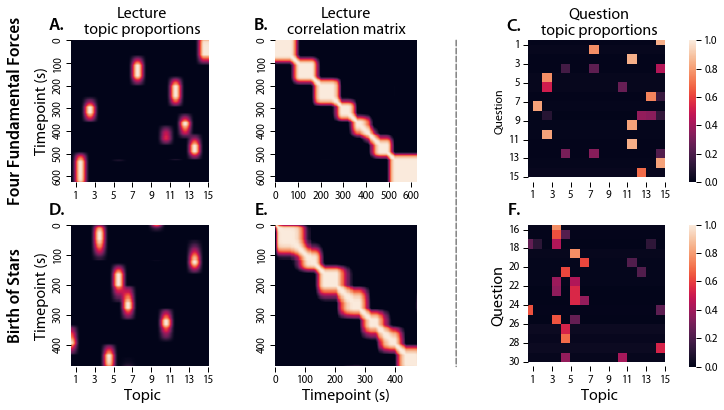

In [4]:
with sns.plotting_context('paper', font_scale=1.25):
    fig, axarr = plt.subplots(2, 4, gridspec_kw=gridspec_kws)
    fig.set_size_inches(12, 6)
    (
        (a, b, sep1, c), 
        (d, e, sep2, f)
    ) = axarr

    # ==================== Four Fundamental Forces =====================
    # lecture topic proportions by timepoint
    sns.heatmap(exp.forces_traj, 
                vmin=0, 
                vmax=1, 
                xticklabels=2, 
                yticklabels=100, 
                cbar=False, 
                cmap=cmap, 
                ax=a)
    a.collections[0].remove()
    aspect = exp.forces_traj.shape[1] / exp.forces_traj.shape[0]
    a.imshow(exp.forces_traj, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
    a.set_title('Lecture\ntopic proportions', fontsize=16)
    a.set_xticklabels(list(range(1, 16, 2)))
    a.set_ylabel('Timepoint (s)', fontsize=16)
    a.annotate('Four Fundamental Forces', 
               xy=(-.75, .5), 
               xycoords=a.yaxis.label, 
               fontweight='semibold',
               size=17,
               rotation=90, 
               ha='right', 
               va='center')

    # lecture timepoint-by-timepoint correlation matrix
    corrmat = np.corrcoef(exp.forces_traj)
    sns.heatmap(corrmat, 
                vmin=0, 
                vmax=1, 
                xticklabels=100, 
                yticklabels=100, 
                cbar=False, 
                cmap=cmap, 
                ax=b)
    b.collections[0].remove()
    b.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
    b.set_title('Lecture\ncorrelation matrix', fontsize=16)

    # topic proportions by quiz question
    sns.heatmap(forces_qs, 
                vmin=0, 
                vmax=1, 
                xticklabels=2, 
                yticklabels=2, 
                cmap=cmap, 
                cbar=True, 
                cbar_kws=cbar_kws, 
                ax=c)
    c.collections[0].remove()
    aspect = forces_qs.shape[1] / forces_qs.shape[0]
    c.imshow(forces_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
    c.set_title('Question\ntopic proportions', fontsize=16)
    c.set_xticklabels(list(range(1, 16, 2)))
    c.set_ylabel('Question', fontsize=12)
    c.set_yticklabels(list(range(1, 16, 2)), rotation=0)

    # ========================= Birth of Stars =========================
    # lecture topic proportions by timepoint
    sns.heatmap(exp.bos_traj, 
                vmin=0, 
                vmax=1, 
                xticklabels=2, 
                yticklabels=100, 
                cbar=False, 
                cmap=cmap, 
                ax=d)
    d.collections[0].remove()
    aspect = exp.bos_traj.shape[1] / exp.bos_traj.shape[0]
    d.imshow(exp.bos_traj, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
    d.set_xlabel('Topic', fontsize=16)
    d.set_xticklabels(list(range(1, 16, 2)))
    d.set_ylabel('Timepoint (s)', fontsize=16)
    d.annotate('Birth of Stars', 
               xy=(-.75, .5), 
               xycoords=d.yaxis.label, 
               fontweight='semibold',
               size=17, 
               rotation=90, 
               ha='right', 
               va='center')

    # lecture timepoint-by-timepoint correlation matrix
    corrmat = np.corrcoef(exp.bos_traj)
    sns.heatmap(corrmat, 
                vmin=0, 
                vmax=1, 
                xticklabels=100, 
                yticklabels=100, 
                cbar=False, 
                cmap=cmap, 
                ax=e)
    e.collections[0].remove()
    e.imshow(corrmat, aspect='equal', vmin=0, vmax=1, cmap=cmap)
    e.set_xlabel('Timepoint (s)', fontsize=16)

    # topic proportions by quiz question
    sns.heatmap(bos_qs, 
                vmin=0, 
                vmax=1, 
                xticklabels=2, 
                yticklabels=2, 
                cmap=cmap, 
                cbar=True, 
                cbar_kws=cbar_kws, 
                ax=f)
    f.collections[0].remove()
    aspect = bos_qs.shape[1] / bos_qs.shape[0]
    f.imshow(bos_qs, aspect=aspect, vmin=0, vmax=1, cmap=cmap)
    f.set_xlabel('Topic', fontsize=16)
    f.set_xticklabels(list(range(1, 16, 2)))
    f.set_ylabel('Question', fontsize=16)
    f.set_yticklabels(list(range(16, 31, 2)), rotation=0)

    # separator line
    xyA = (0, 1)
    xyB = (0, 0)
    vline = ConnectionPatch(xyA, 
                            xyB, 
                            coordsA='axes fraction', 
                            coordsB='axes fraction', 
                            axesA=sep1, 
                            axesB=sep2, 
                            linestyle='--', 
                            linewidth=1.5, 
                            color='grey')
    sep2.add_artist(vline)
    sep1.axis('off')
    sep2.axis('off')

    # panel labels
    labels = 'ABCDEF'
    for i, ax in enumerate((a, b, c, d, e, f)):
        ax.text(-.1, 1.07, 
                f'{labels[i]}.', 
                fontsize=18,
                fontweight='semibold',
                horizontalalignment='center', 
                transform=ax.transAxes)

#     plt.savefig(FIG_DIR.joinpath('content-timeseries.pdf'), 
#                 dpi=1000, 
#                 bbox_inches='tight')
    plt.show()

# Lecture-question similarity timeseries fig

In [5]:
# some sample timepoints to compare lecture & question content
forces_tpts = [117]
bos_tpts = [171]

forces_qcorrs = 1 - cdist(exp.forces_traj, forces_qs, 'correlation')
bos_qcorrs = 1 - cdist(exp.bos_traj, bos_qs, 'correlation')

palette = sns.hls_palette(15, h=.3)

# color each sample timepoint's marker to match the most similar question
forces_tpt_colors = np.array(palette.as_hex())[forces_qcorrs[forces_tpts].argmax(axis=1)]
bos_tpt_colors = np.array(palette.as_hex())[bos_qcorrs[bos_tpts].argmax(axis=1)]

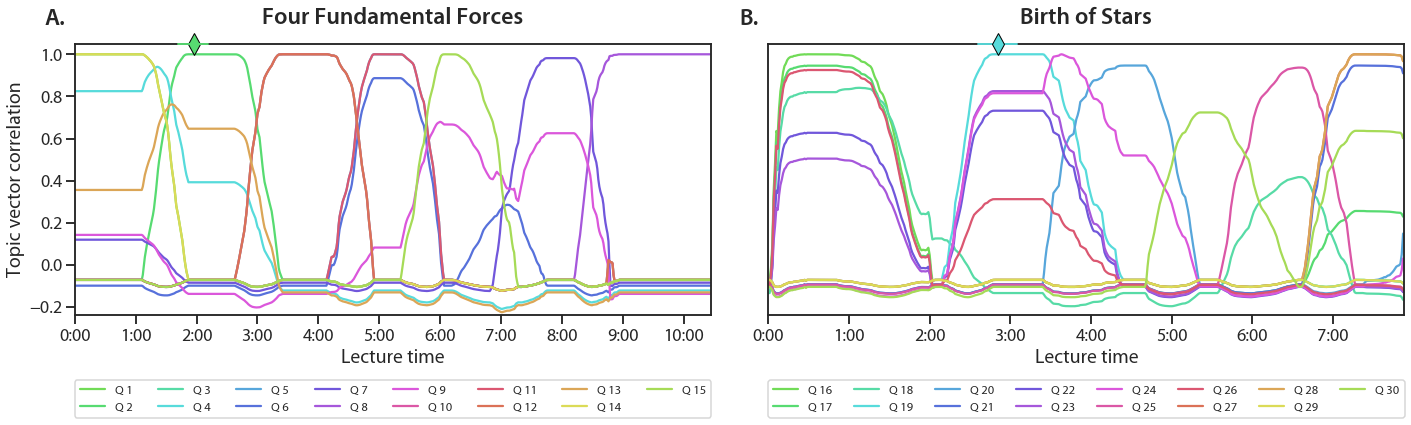

In [6]:
with (
    sns.plotting_context('talk', font_scale=1.1), 
    sns.axes_style('ticks'), 
    sns.color_palette(palette)
):
    set_figure_style()
    fig, axarr = plt.subplots(1, 2, sharey=True)
    fig.set_size_inches(20, 7)
    fax, bax = axarr

    # ==================== Four Fundamental Forces =====================
    fax.plot(forces_qcorrs)
    for tpt_ix in range(len(forces_tpts)):
        tpt = forces_tpts[tpt_ix]
        tpt_color = forces_tpt_colors[tpt_ix]
        fax.plot(tpt, 
                 1.05, 
                 tpt_color, 
                 linestyle='', 
                 marker='d', 
                 markersize=15, 
                 markeredgecolor='k',
                 clip_on=False, 
                 zorder=11)
        fax.plot(np.arange(tpt-15, tpt+15), 
                 [1.05]*30, 
                 tpt_color, 
                 linewidth=fax.spines['top'].get_linewidth(),
                 clip_on=False,
                 zorder=11)
    fax.set_xlim(0, exp.forces_traj.shape[0])
    fax.set_ylim(-.24, 1.05)
    fax.set_xlabel('Lecture time')
    fax.set_ylabel('Topic vector correlation')
    fax.set_title('Four Fundamental Forces', 
                  y=1.05, 
                  fontsize='large', 
                  fontweight='semibold')
    fax.set_xticks(range(0, len(exp.forces_traj), 60), 
                   [f'{i//60}:00' for i in range(0, len(exp.forces_traj), 60)])
    fax.legend(labels=[f'Q {i}' for i in range(1, 16)], 
               fontsize=12.5, 
               loc=3, 
               ncol=8, 
               mode='expand',
               bbox_to_anchor=(-0.01, -.4, 1.02, 1))
    fax.grid(False)
    fax.text(-0.015, 
             1.07, 
             'A.', 
             fontsize='large', 
             fontweight='semibold', 
             horizontalalignment='right', 
             transform=fax.transAxes)

    # ========================= Birth of Stars =========================
    bax.plot(bos_qcorrs)
    for tpt_ix in range(len(bos_tpts)):
        tpt = bos_tpts[tpt_ix]
        tpt_color = bos_tpt_colors[tpt_ix]
        bax.plot(tpt, 
                 1.05, 
                 tpt_color, 
                 linestyle='', 
                 marker='d', 
                 markersize=15, 
                 markeredgecolor='k',
                 clip_on=False, 
                 zorder=11)
        bax.plot(np.arange(tpt-15, tpt+15), 
                 [1.05]*30, 
                 tpt_color, 
                 linewidth=bax.spines['top'].get_linewidth(),
                 clip_on=False,
                 zorder=10)
    bax.set_xlim(0, exp.bos_traj.shape[0])
    bax.set_ylim(-.24, 1.05)
    bax.set_xlabel('Lecture time')
    bax.set_title('Birth of Stars', 
                  y=1.05, 
                  fontsize='large', 
                  fontweight='semibold')
    bax.set_xticks(range(0, len(exp.bos_traj), 60), 
                   [f'{i//60}:00' for i in range(0, len(exp.bos_traj), 60)])
    bax.tick_params(axis='y', length=0)
    bax.legend(labels=[f'Q {i}' for i in range(16, 31)], 
               fontsize=12.5, 
               loc=3, 
               ncol=8, 
               mode='expand',
               bbox_to_anchor=(-0.01, -.4, 1.02, 1))
    bax.grid(False)
    bax.text(-0.015, 
             1.07, 
             'B.', 
             fontsize='large', 
             fontweight='semibold', 
             horizontalalignment='right', 
             transform=bax.transAxes)

    plt.subplots_adjust(wspace=-1)
    plt.tight_layout()
#     plt.savefig(FIG_DIR.joinpath('lecture-question-similarity.pdf'), 
#                 bbox_inches='tight')
    plt.show()

# Get lecture and question text for sample timepoints

In [7]:
forces_text_samples = []
for tpt in forces_tpts:
    lecture_text = exp.get_timepoint_text('forces', tpt)
    top_q = np.argmax(forces_qcorrs[tpt]) + 1
    q_text = exp.questions.loc[top_q, 'question']
    
    forces_text_samples.append(f'...{lecture_text}...')
    forces_text_samples.append({f'Q{top_q}': f'<br>{q_text}'})
    

bos_text_samples = []
for tpt in bos_tpts:
    lecture_text = exp.get_timepoint_text('bos', tpt)
    top_q = np.argmax(bos_qcorrs[tpt]) + 16
    q_text = exp.questions.loc[top_q, 'question']
    
    bos_text_samples.append(f'...{lecture_text}...')
    bos_text_samples.append({f'Q{top_q}': f'<br>{q_text}'})

In [8]:
multicol_display(*forces_text_samples, 
                 ncols=2, 
                 caption='Four Fundamental Forces',
                 col_headers=('Lecture text', 'Most similar question'),
                 header_css={'text-align': 'center'},
                 cell_css={'text-align': 'center', 'font-size': '14px'})

...minus and beta plus decay and just to give you an example of the actual weak interaction if I had some cesium 137 137 means it has 137 nucleons a nucleon is either a proton or a neutron you add up the protons and neutrons of cesium you get 137 and it is cesium because it has exactly 55 protons now the weak interaction is what's responsible for one of the neutrons essentially one of its corks flipping...,Q2: Which of the following is an example of the Weak Interaction?


In [9]:
multicol_display(*bos_text_samples, 
                 ncols=2, 
                 caption='Birth of Stars',
                 col_headers=('Lecture text', 'Most similar question'),
                 header_css={'text-align': 'center'},
                 cell_css={'text-align': 'center', 'font-size': '14px'})

...all of a sudden the strong force will overtake it's much stronger than the Coulomb force and that these two hydrogen's will actually these this these nucleuses would actually fuse or that nuclei well anyway they would actually fuse together and so that is what actually happens once this gets hot and dense enough you now have enough pressure enough temperature to overcome the Coulomb force and bring these protons close enough to each other for fusion to occur for fusion fusion...,Q19: Which of the following can overcome the Coulomb Force?
